<a href="https://colab.research.google.com/github/SebastianJimenez612/ComputerVisionGrupo/blob/main/Equipo_14_m%C3%A9todo_segmentaci%C3%B3n_Region_growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Métodos de segmentación de imágenes**

La segmentación de imágenes es el conjunto de técnicas de procesamiento que se utilizan para la extracción de información útil de una escena y con esto facilitar su observación y análisis para la toma de decisiones, dicha segmentación se realiza dado que el resto del contenido de la imagen puede no ser útil para el propósito buscado.

Los algoritmos de segmentación están basados en las propiedades y características propia de la imagen una vez que está en escala de grises y son:
- **Discontinuidad**. Idenificación de los bordes de las regiones, dado que dichos bordes son lo suficientemente evidentes (cambios muy bruscos en niveles de intensidad) en comparación con el resto de la imagen. Uso y criterios de la primera y segunda derivada.
- **Similitud**. La imagen se descompone o subdivide en diferentes regiones basándose en la similitud (valores similares) de su vecino más próximo, hasta alcanzar un umbral establecido a priori.
- **Umbralización**. Métodos basados en una vez que se realiza la binarización de la imagen, dicha segmentación también es considerada un método de similitud.

De acuerdo a  (Xu, Carlinet, Gerard, & Najman, 2017) los métodos de segmentación de imágenes los dividen en 8 categorías:
1. Métodos de umbralización;
2. Crecimiento de regiones; 
3. Clasificadores;
4. Métodos de agrupamiento (clustering methods);
5. Modelos de campos aleatorios de Markov;
6. Redes neurales artificiales;
7. Modelos deformables; 
8. Métodos guiados por plantillas (atlas-guided methods).

**Crecimiento de regiones (Region Growing)**

En este método, se agrupan los pixeles iniciando desde una región *semilla*, y se le incorpora los pixeles vecinos en forma iterativa, hasta alcanzar un umbral establecido conocido como criterio de parada.

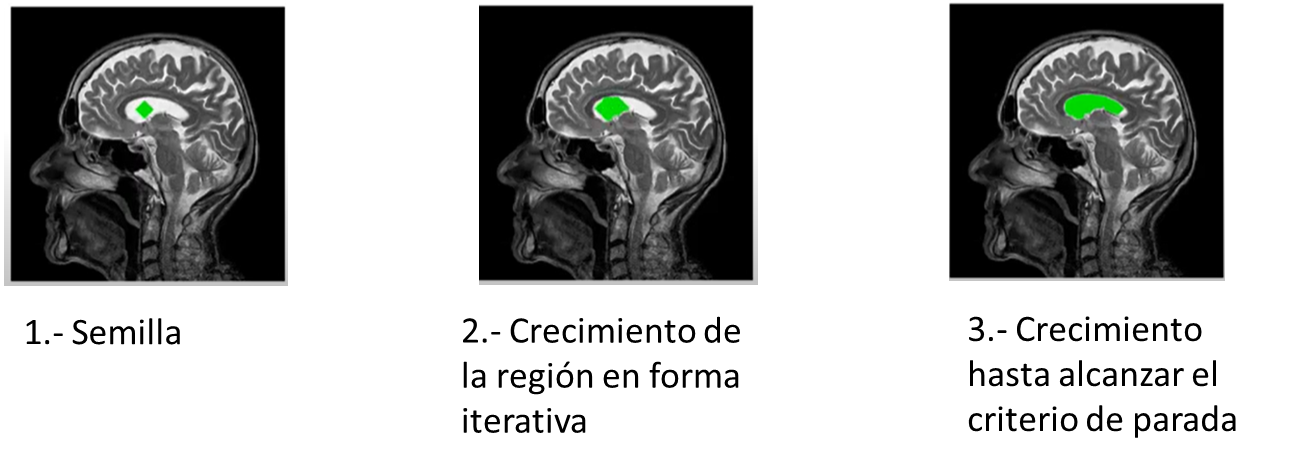

**Input**. Coordenadas del punto semilla **p**=(x,y) así como la intensidad del umbral f<sub>th</sub>

Paso 1. Definimos la región inicial **R** como la misma semilla inicial **p** y definimos el valor de referencia (como intensidad en la escala de grises) **r** que está en función de p ==> f(**p**)

Paso 2. Identificamos a todos los pixeles vecinos de la región segmentada **p**<sub>i</sub>

Paso 3. Crecemos la región **R** con todos los vecinos que tengan un umbral menor al parámetro *r* inicialmente establecido.

Paso 4. Actualizamos el valor de referencia *r* = *media*{f(**R**)}, incluyendo los que recientemente se incorporaron en el paso 2

Los pasos del 2 al 4 se ejecutan hasta que la salida = *media*{f(**R**)} no sea menor en ninguno de los pixeles vecinos respecto la definición del umbral *r*

**Output** la región **(R)**

*   ***Tambien se puede encontrar el metodo "sin semilla"***



En lugar de utilizar puntos semilla para iniciar la segmentación, el método sin semilla de crecimiento de regiones se basa en la similitud de color o textura entre los píxeles adyacentes para agruparlos en regiones. El algoritmo comienza con un conjunto vacío de regiones y se va añadiendo cada píxel a una región si cumple con un cierto criterio de similitud con los píxeles que ya pertenecen a esa región.

A continuación se describen los pasos principales del algoritmo de crecimiento de regiones sin semilla:



*   Comenzar con un conjunto vacío de regiones.
*   Seleccionar un píxel no asignado al azar y agregarlo a una nueva región.
*   Para cada píxel adyacente al píxel agregado en el paso anterior, calcular la similitud con la región a la que pertenece el píxel original.
*   Si la similitud es mayor que un cierto umbral predefinido, agregar el píxel a la misma región que el píxel original.
*   Repetir los pasos 3 y 4 para todos los píxeles adyacentes a los píxeles que se agregaron a la región actual en el paso anterior.
*   Si no hay más píxeles adyacentes que puedan ser agregados a la región actual, agregar una nueva región y seleccionar un píxel no asignado al azar para comenzar el proceso de segmentación de una nueva región.
*   Repetir los pasos 3 al 6 hasta que todos los píxeles de la imagen hayan sido asignados a una región.





Es importante destacar que el algoritmo de crecimiento de regiones sin semilla es más lento que el método de crecimiento de regiones sembrado, ya que cada píxel debe ser comparado con cada región existente para determinar su similitud, lo que puede ser computacionalmente costoso. Sin embargo, este método puede ser útil cuando no se dispone de información previa sobre los puntos semilla o cuando los objetos de interés no son fácilmente identificables a simple vista.

**Ejemplos**

Consideraremos la siguiente imagen en donde cada valor de las celdas representa en valor de cada pixel en la imagen de estudio en escala de grises.

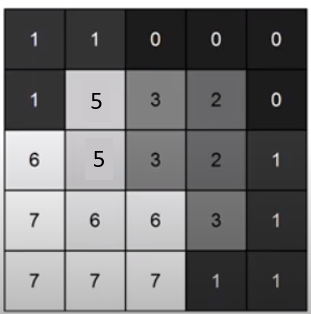

**Paso 1.-** Establecemos la semilla como el pixel central de la imagen => **p**=coordenada (3,3), por lo tanto el valor de referencia ***r***= 3, y definimos el umbral f<sub>th</sub>=1 y tenemos:

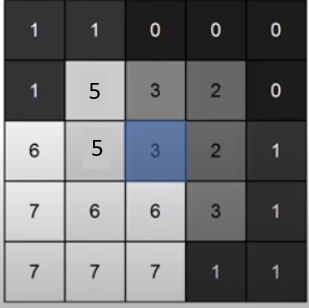

**Paso 2**. Identificamos a todos los vecinos de la región de interés, en este caso la región de interés es semilla al ser la primera iteración, para nuestro ejemplo seleccionamos todos los pixeles adyacentes a la región (pixeles resaltados en rojo)

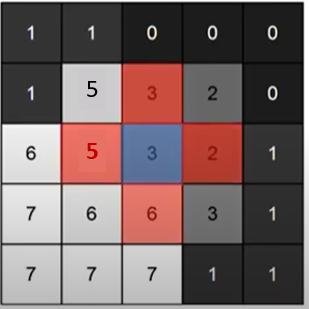

**Paso 3.** Nos quedamos con todos aquellos pixeles cuya diferencia respecto el valor de la región sea menor al umbral establecido, es decir, el valor (*r*) de la región = 3 y el umbral f<sub>th</sub> = 1.

Los únicos pixeles que cumplen dicha restricción son los pintados en azul.

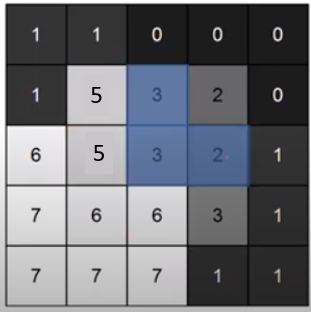

**Paso 4**. Actualizamos el valor de región, como el promedio de los valores de los pixeles contenidos en dicha región, para nuestro caso *r*=(3 + 3 + 2) / 3 = 2.7.

Identificamos los vecinos o pixeles adyacentes a la nueva región, quedando de la siguiente forma (los pixeles vecinos son los identificados en rojo para esta segunda iteración).

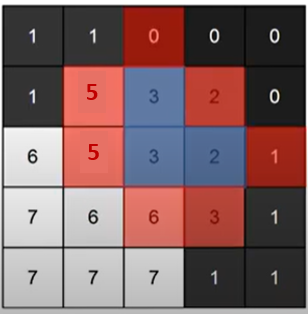

Los pixeles que difieren menos una 1 con respecto el valor medio de la nueva región (que es 2.7) son:

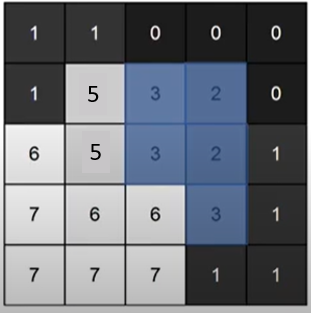

Actualizamos el valor de nueva región, como el promedio de los valores de los pixeles contenidos en dicha región, r=(3 + 3 + 2 + 2 + 3) / 5 = 2.6

Como podemos apreciar, todos los vecinos (pixeles adyacentes) a la nueva región segmentada presentan diferencias intensidad mayores a 1, por lo tanto, el algoritmo de crecimiento de regiones se detiene.

La región (**R**) de salida es la identificada dentro del recuadro rojo:

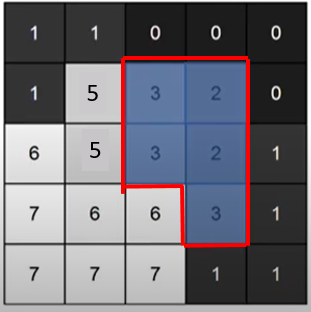

In [ ]:
#Código en python
#Crecimiento de región
import numpy as np

def distance(a,b):
  return np.abs(a-b)

def region_growing_average(img,img_t,tolerance,seed):
  x=seed[0]; y=seed[1]
  img_t[x,y]=1

  avg=np.mean(img[np.where(img_t==1)])

  #Ubicamos los 4 vecinos del pixel semilla para la primera iteración
  if(y+1 < img.shape[1] and img_t[x,y+1]==0 and distance(avg,img[x,y+1])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x,y+1])
  
  if(y-1>=0 and img_t[x,y-1]==0 and distance(avg,img[x,y-1])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x,y-1])
  
  if(x+1<img.shape[0] and img_t[x+1,y]==0 and distance(avg,img[x+1,y])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x+1,y])

  if(x-1>=0 and img_t[x-1,y]==0 and distance(avg,img[x-1,y])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x-1,y])

In [ ]:
#Creamos la imagen original
img_test=np.random.rand(size[0],size[1])
img_test[2:5,4:12]=100+np.random.randint(0,3,[3,8])
img_test[5:13,2:5]=112+np.random.randint(0,20,[8,3])

In [ ]:
img_seed1=np.zeros(img_test.shape)
img_seed2=np.zeros(img_test.shape)
img_seed3=np.zeros(img_test.shape)

region_growing_average(img_test,img_seed1,8,[6,3]) #Definimos distintos niveles de tolerancia, en este caso es 8
region_growing_average(img_test,img_seed2,16,[6,3])
region_growing_average(img_test,img_seed3,24,[6,3])

Text(0.5, 1.0, 'Tolerance=24')

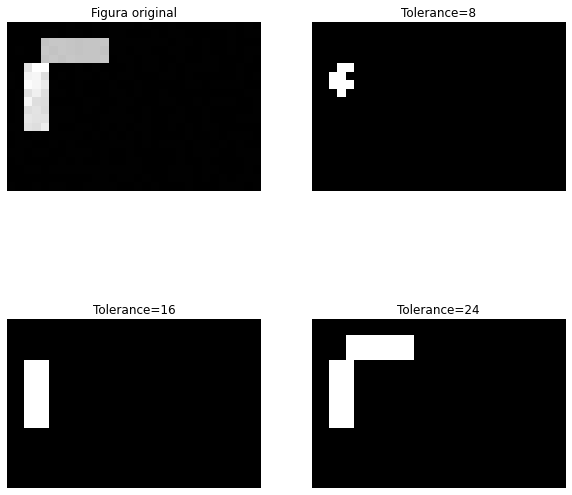

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221);plt.imshow(img_test,cmap='gray');plt.axis('off'); plt.title('Figura original')
plt.subplot(222);plt.imshow(img_seed1*255,cmap='gray');plt.axis('off');plt.title('Tolerance=8')
plt.subplot(223);plt.imshow(img_seed2*255,cmap='gray');plt.axis('off'); plt.title('Tolerance=16')
plt.subplot(224);plt.imshow(img_seed3*255,cmap='gray');plt.axis('off'); plt.title('Tolerance=24')


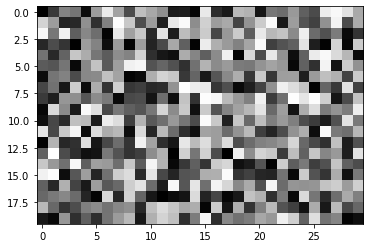

In [ ]:
#Ejemplo 2
img = np.random.rand(size[0],size[1])
plt.imshow(img,cmap='gray')

In [ ]:
def region_growing_average(img,img_t,tolerance,seed):
  x=seed[0]; y=seed[1]
  img_t[x,y]=1

  avg=np.mean(img[np.where(img_t==1)])

  #Ubicamos los 4 vecinos del pixel semilla para la primera iteración
  if(y+1 < img.shape[1] and img_t[x,y+1]==0 and distance(avg,img[x,y+1])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x,y+1])
  
  if(y-1>=0 and img_t[x,y-1]==0 and distance(avg,img[x,y-1])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x,y-1])
  
  if(x+1<img.shape[0] and img_t[x+1,y]==0 and distance(avg,img[x+1,y])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x+1,y])

  if(x-1>=0 and img_t[x-1,y]==0 and distance(avg,img[x-1,y])<=tolerance):
    region_growing_average(img,img_t,tolerance,[x-1,y])

Text(0.5, 1.0, 'Tolerance=1')

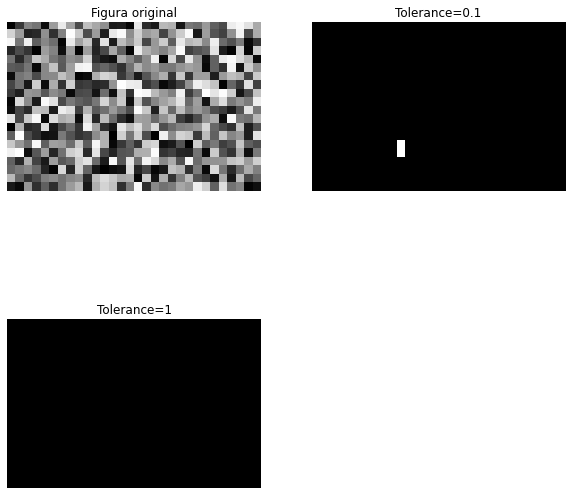

In [ ]:
img_seed4=np.zeros(img.shape)
img_seed5=np.zeros(img.shape)

region_growing_average(img,img_seed4,0.1,[15,10])
region_growing_average(img,img_seed5,1,[15,10])

plt.figure(figsize=(10,10))
plt.subplot(221);plt.imshow(img,cmap='gray');plt.axis('off'); plt.title('Figura original')
plt.subplot(222);plt.imshow(img_seed4*255,cmap='gray');plt.axis('off');plt.title('Tolerance=0.1')
plt.subplot(223);plt.imshow(img_seed5*255,cmap='gray');plt.axis('off'); plt.title('Tolerance=1')

## Sin semilla

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen que deseas segmentar
img = cv2.imread('cebolla.jpg')

# Conviértela a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [6]:
def region_growing(image, seed=None, threshold=1):
    # Si no se especifica una semilla, se selecciona un punto aleatorio en la imagen
    if seed is None:
        seed = (np.random.randint(image.shape[0]), np.random.randint(image.shape[1]))
    
    # Crea una máscara del mismo tamaño que la imagen, inicialmente en ceros
    mask = np.zeros_like(image)
    
    # Define las coordenadas de los píxeles vecinos (8-conectividad)
    neighbors = [(-1,-1), (-1,0), (-1,1), (0,-1), (0,1), (1,-1), (1,0), (1,1)]
    
    # Agrega la semilla a la región inicial
    region = [seed]
    
    # Mientras queden píxeles por revisar
    while region:
        # Obtén el primer píxel de la región
        current_pixel = region.pop(0)
        
        # Revisa los píxeles vecinos
        for neighbor in neighbors:
            # Calcula las coordenadas del píxel vecino
            r = current_pixel[0] + neighbor[0]
            c = current_pixel[1] + neighbor[1]
            
            # Si el píxel vecino está dentro de la imagen y no ha sido agregado a la región
            if 0 <= r < image.shape[0] and 0 <= c < image.shape[1] and mask[r,c] == 0:
                # Calcula la diferencia absoluta de intensidad entre el píxel actual y el vecino
                diff = abs(int(image[r,c]) - int(image[current_pixel]))
                
                # Si la diferencia es menor o igual al umbral, agrega el vecino a la región y a la máscara
                if diff <= threshold:
                    region.append((r,c))
                    mask[r,c] = 255
    
    return mask


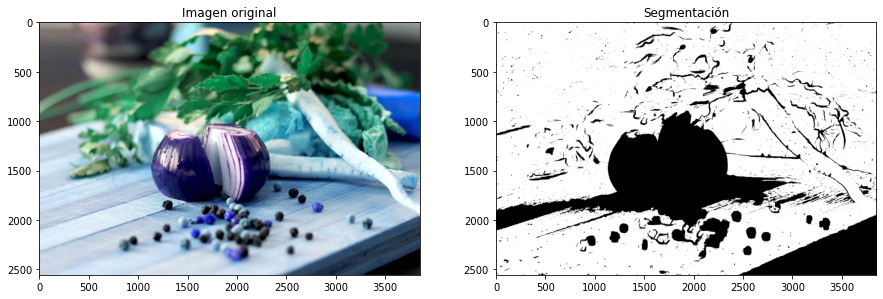

In [8]:
# Aplica el método de Region Growing sin semilla a la imagen
mask = region_growing(gray)

# Muestra la imagen original y la segmentación resultante
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Segmentación')

plt.show()

**Referencias**

Guada, c. (2019). Problemas de segmentación y detención de bordes en imágenes digitales con información borrosa: https://eprints.ucm.es/id/eprint/55256/1/T41074.pdf

La Serna, N. (2009). Técnicas de Segmentación en Procesamiento Digital de Imágenes. Revista de Ingeniería de Sistemas e Informatica, 9-16. Obtenido de https://sisbib.unmsm.edu.pe/bibvirtual/publicaciones/risi/2009_n2/v6n2/a02v6n2.pdf

Pertuz, S. (22 de Julio de 2020). Introducción al Procesamiento Digital de Imágenes. Obtenido de Segmentación por crecimiento de regiones (region growing): https://www.youtube.com/watch?v=hbPnjjmgI94&t=11s

Wang, Y.-H. (s.f.). Tutorial: Image Segmentation. Taipei, Taiwan: Graduate Institute of Communication Engineering National Taiwan University. Obtenido de http://disp.ee.ntu.edu.tw/meeting/昱翔/Segmentation%20tutorial.pdf

Xu, Y., Carlinet, E., Gerard, T., & Najman, L. (2017). Hierarchical Segmentation Using Tree-Based Shape Spaces. En Y. Xu, E. Carlinet, T. Gerard, & L. Najman, Transactions on Pattern Analysis and Machine Intelligence (págs. 457-469).

